Part 1. Import Packages

In [270]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import gc
import xgboost as xgb
%matplotlib inline
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

Part 2. Import Files

In [271]:
train = pd.read_csv('train_2016_v2.csv')
prop = pd.read_csv('properties_2016.csv')
sample = pd.read_csv('sample_submission.csv')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (22,32,34,49,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [272]:
for c, dtype in zip(prop.columns, prop.dtypes):
	if dtype == np.float64:
		prop[c] = prop[c].astype(np.float32)

Part 3. Overview of Data

(1) Number and types of columns
train: parcelid(int), logerror(float), transactiondate(object)

prop: parcelid(int) 
      hashottuborspa,propertycountylandusecode,propertyzoningdesc,fireplaceflag,taxdelinquencyflag are object(5)
      rest are float(52)
      
sample: parcelid(int), 201610-201712(int,6)

(2) Look at categorical variables:
a. hashottubeorspa, fireplaceflag, taxdelinquencyflag only gives 'true' or 'Y' for those with it. Can change to 1 or 0.

In [273]:
# Look at all the column values
#print(train.columns.values)
#print(prop.columns.values)
#print(sample.columns.values)

In [274]:
#train.head()

In [275]:
#prop.head()

In [276]:
#sample.head()

In [277]:
# Look at the basic info about all the columns
#train.info(null_counts=True)
#print('_'*40)
#prop.info(null_counts=True)
#print('_'*40)
#sample.info(null_counts=True)

In [278]:
#train.describe()

In [279]:
prop.describe(include=['O'])

,hashottuborspa,propertycountylandusecode,propertyzoningdesc,fireplaceflag,taxdelinquencyflag
count,69014,2972940,1978629,5163,56462
unique,1,240,5638,1,1
top,True,0100,LAR1,True,Y
freq,69014,1153896,275029,5163,56462


In [280]:
#sample.describe()

Part 4. Merging data

In [281]:
df_train = train.merge(prop, how='left', on='parcelid')

In [282]:
df_train.head()

,parcelid,logerror,transactiondate,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,finishedfloor1squarefeet,calculatedfinishedsquarefeet,finishedsquarefeet12,finishedsquarefeet13,finishedsquarefeet15,finishedsquarefeet50,finishedsquarefeet6,fips,fireplacecnt,fullbathcnt,garagecarcnt,garagetotalsqft,hashottuborspa,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,poolcnt,poolsizesum,pooltypeid10,pooltypeid2,pooltypeid7,propertycountylandusecode,propertylandusetypeid,propertyzoningdesc,rawcensustractandblock,regionidcity,regionidcounty,regionidneighborhood,regionidzip,roomcnt,storytypeid,threequarterbathnbr,typeconstructiontypeid,unitcnt,yardbuildingsqft17,yardbuildingsqft26,yearbuilt,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,11016594,0.0276,2016-01-01,1.0,NaN,NaN,2.0,3.0,NaN,4.0,2.0,NaN,NaN,1684.0,1684.0,NaN,NaN,NaN,NaN,6037.0,NaN,2.0,NaN,NaN,NaN,2.0,34280992.0,-118488536.0,7528.0,NaN,NaN,NaN,NaN,NaN,0100,261.0,LARS,60371068.0,12447.0,3101.0,31817.0,96370.0,0.0,NaN,NaN,NaN,1.0,NaN,NaN,1959.0,NaN,NaN,122754.0,360170.0,2015.0,237416.0,6735.879883,NaN,NaN,6.037107e+13
1,14366692,-0.1684,2016-01-01,NaN,NaN,NaN,3.5,4.0,NaN,NaN,3.5,NaN,NaN,2263.0,2263.0,NaN,NaN,NaN,NaN,6059.0,NaN,3.0,2.0,468.0,NaN,NaN,33668120.0,-117677552.0,3643.0,NaN,NaN,NaN,NaN,NaN,1,261.0,NaN,60590524.0,32380.0,1286.0,NaN,96962.0,0.0,NaN,1.0,NaN,NaN,NaN,NaN,2014.0,NaN,NaN,346458.0,585529.0,2015.0,239071.0,10153.019531,NaN,NaN,NaN
2,12098116,-0.0040,2016-01-01,1.0,NaN,NaN,3.0,2.0,NaN,4.0,3.0,NaN,NaN,2217.0,2217.0,NaN,NaN,NaN,NaN,6037.0,NaN,3.0,NaN,NaN,NaN,2.0,34136312.0,-118175032.0,11423.0,NaN,NaN,NaN,NaN,NaN,0100,261.0,PSR6,60374640.0,47019.0,3101.0,275411.0,96293.0,0.0,NaN,NaN,NaN,1.0,NaN,NaN,1940.0,NaN,NaN,61994.0,119906.0,2015.0,57912.0,11484.480469,NaN,NaN,6.037464e+13
3,12643413,0.0218,2016-01-02,1.0,NaN,NaN,2.0,2.0,NaN,4.0,2.0,NaN,NaN,839.0,839.0,NaN,NaN,NaN,NaN,6037.0,NaN,2.0,NaN,NaN,NaN,2.0,33755800.0,-118309000.0,70859.0,NaN,NaN,NaN,NaN,NaN,010C,266.0,LAR3,60372964.0,12447.0,3101.0,54300.0,96222.0,0.0,NaN,NaN,NaN,1.0,NaN,NaN,1987.0,NaN,NaN,171518.0,244880.0,2015.0,73362.0,3048.739990,NaN,NaN,6.037296e+13
4,14432541,-0.0050,2016-01-02,NaN,NaN,NaN,2.5,4.0,NaN,NaN,2.5,NaN,NaN,2283.0,2283.0,NaN,NaN,NaN,NaN,6059.0,NaN,2.0,2.0,598.0,NaN,NaN,33485644.0,-117700232.0,6000.0,1.0,NaN,NaN,NaN,1.0,122,261.0,NaN,60590424.0,17686.0,1286.0,NaN,96961.0,8.0,NaN,1.0,NaN,NaN,NaN,NaN,1981.0,2.0,NaN,169574.0,434551.0,2015.0,264977.0,5488.959961,NaN,NaN,6.059042e+13


In [283]:
df_train.describe()

,parcelid,logerror,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,finishedfloor1squarefeet,calculatedfinishedsquarefeet,finishedsquarefeet12,finishedsquarefeet13,finishedsquarefeet15,finishedsquarefeet50,finishedsquarefeet6,fips,fireplacecnt,fullbathcnt,garagecarcnt,garagetotalsqft,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,poolcnt,poolsizesum,pooltypeid10,pooltypeid2,pooltypeid7,propertylandusetypeid,rawcensustractandblock,regionidcity,regionidcounty,regionidneighborhood,regionidzip,roomcnt,storytypeid,threequarterbathnbr,typeconstructiontypeid,unitcnt,yardbuildingsqft17,yardbuildingsqft26,yearbuilt,numberofstories,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyyear,censustractandblock
count,9.027500e+04,90275.000000,28781.000000,261.000000,43.000000,90275.000000,90275.000000,16.0,57364.000000,89093.000000,658.0,6856.000000,89614.000000,85596.000000,33.000000,3564.000000,6856.000000,421.000000,90275.000000,9607.000000,89093.000000,29937.000000,29937.000000,56080.000000,9.027500e+04,9.027500e+04,8.012500e+04,17901.0,969.000000,1161.0,1204.0,16697.0,90275.000000,9.027500e+04,88472.000000,90275.000000,36012.0000,90240.000000,90275.000000,43.0,12009.000000,299.000000,58353.000000,2646.000000,95.000000,89519.000000,20570.000000,8.989500e+04,9.027400e+04,90275.000000,9.027400e+04,90269.000000,1783.000000,8.967000e+04
mean,1.298466e+07,0.011457,1.816372,7.229885,713.581421,2.279474,3.031869,4.0,5.565407,2.309216,66.0,1347.973999,1773.192261,1745.462891,1404.545410,2380.090088,1355.546631,2302.546387,6050.458984,1.187884,2.241231,1.812005,345.521240,3.926979,3.400397e+07,-1.182102e+08,2.911051e+04,1.0,519.827637,1.0,1.0,1.0,261.718475,6.047366e+07,33764.988281,2526.343262,190643.7500,96577.179688,1.478516,7.0,1.008743,6.010034,1.110414,310.142090,311.694733,1968.411621,1.440739,1.800912e+05,4.576778e+05,2015.907715,2.783359e+05,5983.966797,13.402692,6.050518e+13
std,2.504510e+06,0.161079,2.974518,2.716197,437.434174,1.004230,1.156281,0.0,1.900903,0.975884,0.0,652.398499,928.151306,909.935608,110.108215,1068.207886,673.703125,1346.255493,20.723856,0.484169,0.962945,0.608676,267.022003,3.683761,2.649672e+05,3.607793e+05,1.217220e+05,0.0,155.054276,0.0,0.0,0.0,5.183539,2.058606e+05,46667.304688,805.971497,166229.6875,3661.204102,2.819749,0.0,0.100829,0.437233,0.797051,216.722183,346.354889,23.764448,0.544545,2.091276e+05,5.548758e+05,0.907591,4.004918e+05,6838.797852,2.715971,2.051410e+11
min,1.071174e+07,-4.605000,1.000000,2.000000,100.000000,0.000000,0.000000,4.0,1.000000,1.000000,66.0,44.000000,2.000000,2.000000,1056.000000,560.000000,44.000000,257.000000,6037.000000,1.000000,1.000000,0.000000,0.000000,1.000000,3.333930e+07,-1.194479e+08,1.670000e+02,1.0,28.000000,1.0,1.0,1.0,31.000000,6.037101e+07,3491.000000,1286.000000,6952.0000,95982.000000,0.000000,7.0,1.000000,4.000000,1.000000,25.000000,18.000000,1885.000000,1.000000,1.000000e+02,2.200000e+01,2015.000000,2.200000e+01,49.080002,6.000000,6.037101e+13
25%,1.155950e+07,-0.025300,1.000000,7.000000,407.500000,2.000000,2.000000,4.0,4.000000,2.000000,66.0,938.000000,1184.000000,1172.000000,1392.000000,1648.000000,938.000000,1112.000000,6037.000000,1.000000,2.000000,2.000000,0.000000,2.000000,3.381154e+07,-1.184117e+08,5.703000e+03,1.0,420.000000,1.0,1.0,1.0,261.000000,6.037320e+07,12447.000000,1286.000000,46736.0000,96193.000000,0.000000,7.0,1.000000,6.000000,1.000000,180.000000,100.000000,1953.000000,1.000000,8.124500e+04,1.990232e+05,2015.000000,8.222800e+04,2872.830078,13.000000,6.037320e+13
50%,1.254734e+07,0.006000,1.000000,7.000000,616.000000,2.000000,3.000000,4.0,7.000000,2.000000,66.0,1244.000000,1540.000000,1518.000000,1440.000000,2104.500000,1248.000000,2028.000000,6037.000000,1.000000,2.000000,2.000000,433.000000,2.000000,3.402150e+07,-1.181734e+08,7.200000e+03,1.0,500.000000,1.0,1.0,1.0,261.000

Part 5. Manage Categorical Data

(1) Drop 'propertycountylandusecode' and 'propertyzoningdesc'

(2) Convert the other three variables into 0 and 1.

In [284]:
df_train = df_train.drop(['propertycountylandusecode','propertyzoningdesc'],axis=1)

In [285]:
#df_train.shape

In [286]:
#df_train.describe(include=['O'])

In [287]:
df_train['hashottuborspa']=df_train['hashottuborspa'].fillna(False)
df_train['fireplaceflag']=df_train['fireplaceflag'].fillna(False)
df_train['taxdelinquencyflag']=df_train['taxdelinquencyflag'].fillna('N')

In [288]:
#df_train.describe(include=['O'])

In [289]:
df_train['hashottuborspa']=df_train.hashottuborspa.map({True:1.0,False:0.0})
df_train['fireplaceflag']=df_train['fireplaceflag'].map({True:1.0,False:0.0})
df_train['taxdelinquencyflag']=df_train['taxdelinquencyflag'].map({'Y':1.0,'N':0.0})

In [290]:
#df_train.info(null_counts=True)

Part 6. Manage Numerical Data:

a. Fill in NaN

(1) For those with only 1 value: Change NaN into 0.0
buildingclasstypeid, decktypeid,storytypeid

(2) Note that poolcnt=pooltypeid2+pooltypeid7
hashottubeorspa=pooltypeid2+pooltypeid10

Keep: poolcnt(0,1) hashottubeorspa(0,1) --> Fill NaN with 0
Drop: pooltypeid2=(1,1), pooltypeid7=(1,0),pooltypeid10=(0,1)

(3) drop assessmentyear as it's all 2015

(4) fireplacecnt doesn't have value when fireplaceflag has a value
    when fireplaceflag has a value, change fireplacecnt of that entry to 1. Drop fireplaceflag.
    
(5) drop 'threequarterbathnbr' and 'fullbathcnt' because we care more about the total number of bathrooms
    Stil unsure about whether to use bathroomcnt or calculatedbathnbr, so keep both.
    fill calculatedbathnbr with 0 when it's nan
    (I personally want to use calculatedbathnbr, so drop bathroomcnt)
    
(6) drop lotsizesquarefeet, because it varies randomly, and is not directly related to home 

(7) combine yard patio and buildings area together as yardbuildingsqft

(8) calculatedfinishedsquarefeet = 12+13+15+6
    finishedfloor1squarefeet = 50
    drop all with numbers.
    Fill numberofstories nan's with 1.

(9) Fill median for the taxvalue and landtaxvalue. Fill 0 for structure
    give structureprop as struct/all. drop struc/land taxvalue

(10) Fill median for building quality and yearbuilt

(11) Fill 0 for unknown air condition and heating

(12) Drop architecture and type construction because data is so few

(13) Fill in median for census contract, regionidcity,regionidneiborhood, regionidzip and unitcnt, finishedsquarefeet

(14) Fill 0 when doesn't exist: basementsqft, poolsizesum, finishedfloor1

(15) RawcensusData almost equal to censusData, fips is the first 4 digits
Consider dropping RawcensusData and censusData, labeling fips into (1,2,3)

In [291]:
df_train['buildingclasstypeid'].fillna(0,inplace=True)
df_train['decktypeid'].fillna(0,inplace=True)
df_train['storytypeid'].fillna(0,inplace=True)

In [292]:
df_train['poolcnt'].fillna(0,inplace=True)
df_train = df_train.drop(['pooltypeid10','pooltypeid2','pooltypeid7'],axis=1)

In [293]:
df_train = df_train.drop(['assessmentyear'],axis=1)

In [294]:
#df_train.describe()

In [295]:
#df_train.info()

In [296]:
df_train.loc[ df_train['fireplaceflag'] == 1, 'fireplacecnt'] = 1
df_train['fireplacecnt'].fillna(0,inplace=True)
df_train = df_train.drop(['fireplaceflag'],axis=1)

In [297]:
df_train = df_train.drop(['threequarterbathnbr','fullbathcnt'],axis=1)
df_train['calculatedbathnbr'].fillna(0,inplace=True)
df_train = df_train.drop(['bathroomcnt'],axis=1)

In [298]:
df_train = df_train.drop(['lotsizesquarefeet'],axis=1)

In [299]:
df_train['yardbuildingsqft17'].fillna(0,inplace=True)
df_train['yardbuildingsqft26'].fillna(0,inplace=True)
df_train['yardbuildingsqft'] = df_train.yardbuildingsqft17 + df_train.yardbuildingsqft26
df_train = df_train.drop(['yardbuildingsqft17','yardbuildingsqft26'],axis=1)

In [300]:
df_train = df_train.drop(['finishedsquarefeet12','finishedsquarefeet13','finishedsquarefeet15'],axis=1)
df_train = df_train.drop(['finishedsquarefeet50','finishedsquarefeet6'],axis=1)
df_train['numberofstories'].fillna(1,inplace=True)

In [301]:
df_train['taxvaluedollarcnt'].fillna(df_train['taxvaluedollarcnt'].median(),inplace=True)
df_train['landtaxvaluedollarcnt'].fillna(df_train['landtaxvaluedollarcnt'].median(),inplace=True)
df_train['structuretaxvaluedollarcnt'].fillna(0,inplace=True)
df_train['structuretaxprop'] = df_train.structuretaxvaluedollarcnt / df_train.taxvaluedollarcnt
df_train = df_train.drop(['landtaxvaluedollarcnt','structuretaxvaluedollarcnt'],axis=1)

In [302]:
df_train['buildingqualitytypeid'].fillna(df_train['buildingqualitytypeid'].median(),inplace=True)
df_train['yearbuilt'].fillna(df_train['yearbuilt'].median(),inplace=True)

In [303]:
df_train['airconditioningtypeid'].fillna(0,inplace=True)
df_train['heatingorsystemtypeid'].fillna(0,inplace=True)

In [304]:
df_train = df_train.drop(['typeconstructiontypeid','architecturalstyletypeid'],axis=1)

In [305]:
df_train['censustractandblock'].fillna(df_train['censustractandblock'].median(),inplace=True)
df_train['regionidcity'].fillna(df_train['regionidcity'].median(),inplace=True)
df_train['regionidneighborhood'].fillna(df_train['regionidneighborhood'].median(),inplace=True)
df_train['regionidzip'].fillna(df_train['regionidzip'].median(),inplace=True)
df_train['unitcnt'].fillna(df_train['unitcnt'].median(),inplace=True)
df_train['taxamount'].fillna(df_train['taxamount'].median(),inplace=True)
df_train['calculatedfinishedsquarefeet'].fillna(df_train['calculatedfinishedsquarefeet'].median(),inplace=True)

In [306]:
df_train['finishedfloor1squarefeet'].fillna(0,inplace=True)
df_train['basementsqft'].fillna(0,inplace=True)
df_train['poolsizesum'].fillna(0,inplace=True)
df_train['taxdelinquencyyear'].fillna(0,inplace=True)
df_train['garagecarcnt'].fillna(0,inplace=True)
df_train['garagetotalsqft'].fillna(0,inplace=True)

In [307]:
df_train = df_train.drop(['rawcensustractandblock','censustractandblock'],axis=1)
title_mapping = {6037: 0, 6059: 1, 6111: 2}
df_train['fips'] = df_train['fips'].map(title_mapping)

In [308]:
#df_train['taxdelinquencyyear'] = pd.qcut(df_train['taxdelinquencyyear'], 4)
#df_train[['taxdelinquencyyear', 'logerror']].groupby(['taxdelinquencyyear'], as_index=False).mean().sort_values(by='taxdelinquencyyear', ascending=True)

In [309]:
df_train.describe()

,parcelid,logerror,airconditioningtypeid,basementsqft,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,finishedfloor1squarefeet,calculatedfinishedsquarefeet,fips,fireplacecnt,garagecarcnt,garagetotalsqft,hashottuborspa,heatingorsystemtypeid,latitude,longitude,poolcnt,poolsizesum,propertylandusetypeid,regionidcity,regionidcounty,regionidneighborhood,regionidzip,roomcnt,storytypeid,unitcnt,yearbuilt,numberofstories,taxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,yardbuildingsqft,structuretaxprop
count,9.027500e+04,90275.000000,90275.000000,90275.000000,90275.000000,90275.000000,90275.000000,90275.000000,90275.000000,90275.000000,90275.000000,90275.000000,90275.000000,90275.000000,90275.000000,90275.000000,90275.000000,9.027500e+04,9.027500e+04,90275.000000,90275.000000,90275.000000,90275.000000,90275.000000,90275.000000,90275.000000,90275.000000,90275.000000,90275.000000,90275.000000,90275.000000,9.027500e+04,90275.000000,90275.000000,90275.000000,90275.000000,90275.000000
mean,1.298466e+07,0.011457,0.579086,0.339895,3.031869,0.000709,6.088408,2.278981,0.481063,102.372864,1771.482056,0.430872,0.128873,0.600897,114.581764,0.026198,2.439491,3.400397e+07,-1.182102e+08,0.198294,5.579762,261.718475,33595.238281,2526.343262,147460.687500,96577.156250,1.478516,0.003334,1.071371,1968.414185,1.100426,4.576766e+05,5983.871094,0.019751,0.264713,9.418410,0.449777
std,2.504510e+06,0.161079,1.880391,18.203150,1.156281,0.053243,1.664423,1.004771,5.615493,399.611816,924.966125,0.636121,0.401185,0.921999,223.815826,0.159724,3.472606,2.649672e+05,3.607793e+05,0.398644,55.928501,5.183539,46222.488281,805.971497,110690.742188,3660.499268,2.819749,0.152708,0.643227,23.664705,0.318982,5.548729e+05,6838.576660,0.139143,1.902622,66.971451,0.194333
min,1.071174e+07,-4.605000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.333930e+07,-1.194479e+08,0.000000,0.000000,31.000000,3491.000000,1286.000000,6952.000000,95982.000000,0.000000,0.000000,1.000000,1885.000000,1.000000,2.200000e+01,49.080002,0.000000,0.000000,0.000000,0.000000
25%,1.155950e+07,-0.025300,0.000000,0.000000,2.000000,0.000000,4.000000,2.000000,0.000000,0.000000,1187.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.381154e+07,-1.184117e+08,0.000000,0.000000,261.000000,12447.000000,1286.000000,118887.000000,96193.000000,0.000000,0.000000,1.000000,1953.000000,1.000000,1.990235e+05,2872.884888,0.000000,0.000000,0.000000,0.295312
50%,1.254734e+07,0.006000,0.000000,0.000000,3.000000,0.000000,7.000000,2.000000,0.000000,0.000000,1540.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,3.402150e+07,-1.181734e+08,0.000000,0.000000,261.000000,25218.000000,3101.000000,118887.000000,96393.000000,0.000000,0.000000,1.000000,1970.000000,1.000000,3.428720e+05,4542.750000,0.000000,0.000000,0.000000,0.432941
75%,1.422755e+07,0.039200,1.000000,0.000000,4.000000,0.000000,7.000000,3.000000,0.000000,0.000000,2089.000000,1.000000,0.000000,2.000000,0.000000,0.000000,2.000000,3.417274e+07,-1.179216e+08,0.000000,0.000000,266.000000,45457.000000,3101.000000,118887.000000,96987.000000,0.000000,0.000000,1.000000,1987.000000,1.000000,5.405890e+05,6900.600098,0.000000,0.000000,0.000000,0.600006
max,1.629608e+08,4.737000,13.000000,1555.000000,16.000000,4.000000,12.000000,20.000000,66.000000,7625.000000,22741.000000,2.000000,5.000000,24.000000,7339.000000,1.000000,24.000000,3.481601e+07,-1.175549e+08,1.000000,1750.000000,275.000000,396556.000000,3101.000000,764167.000000,399675.000000,18.000000,7.000000,143.000000,2015.000000,4.000000,2.775000e+07,321936.093750,1.000000,99.000000,2678.000000,0.998986


In [310]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90275 entries, 0 to 90274
Data columns (total 38 columns):
parcelid                        90275 non-null int64
logerror                        90275 non-null float64
transactiondate                 90275 non-null object
airconditioningtypeid           90275 non-null float32
basementsqft                    90275 non-null float32
bedroomcnt                      90275 non-null float32
buildingclasstypeid             90275 non-null float32
buildingqualitytypeid           90275 non-null float32
calculatedbathnbr               90275 non-null float32
decktypeid                      90275 non-null float32
finishedfloor1squarefeet        90275 non-null float32
calculatedfinishedsquarefeet    90275 non-null float32
fips                            90275 non-null int64
fireplacecnt                    90275 non-null float32
garagecarcnt                    90275 non-null float32
garagetotalsqft                 90275 non-null float32
hashottuborspa  

In [311]:
for c, dtype in zip(df_train.columns, df_train.dtypes):
	if dtype == np.float64:
		df_train[c] = df_train[c].astype(np.float32)

In [312]:
train = df_train.drop(['parcelid','transactiondate'], axis=1)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\matrix.py:143: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  if xticklabels == []:
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\matrix.py:151: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  if yticklabels == []:


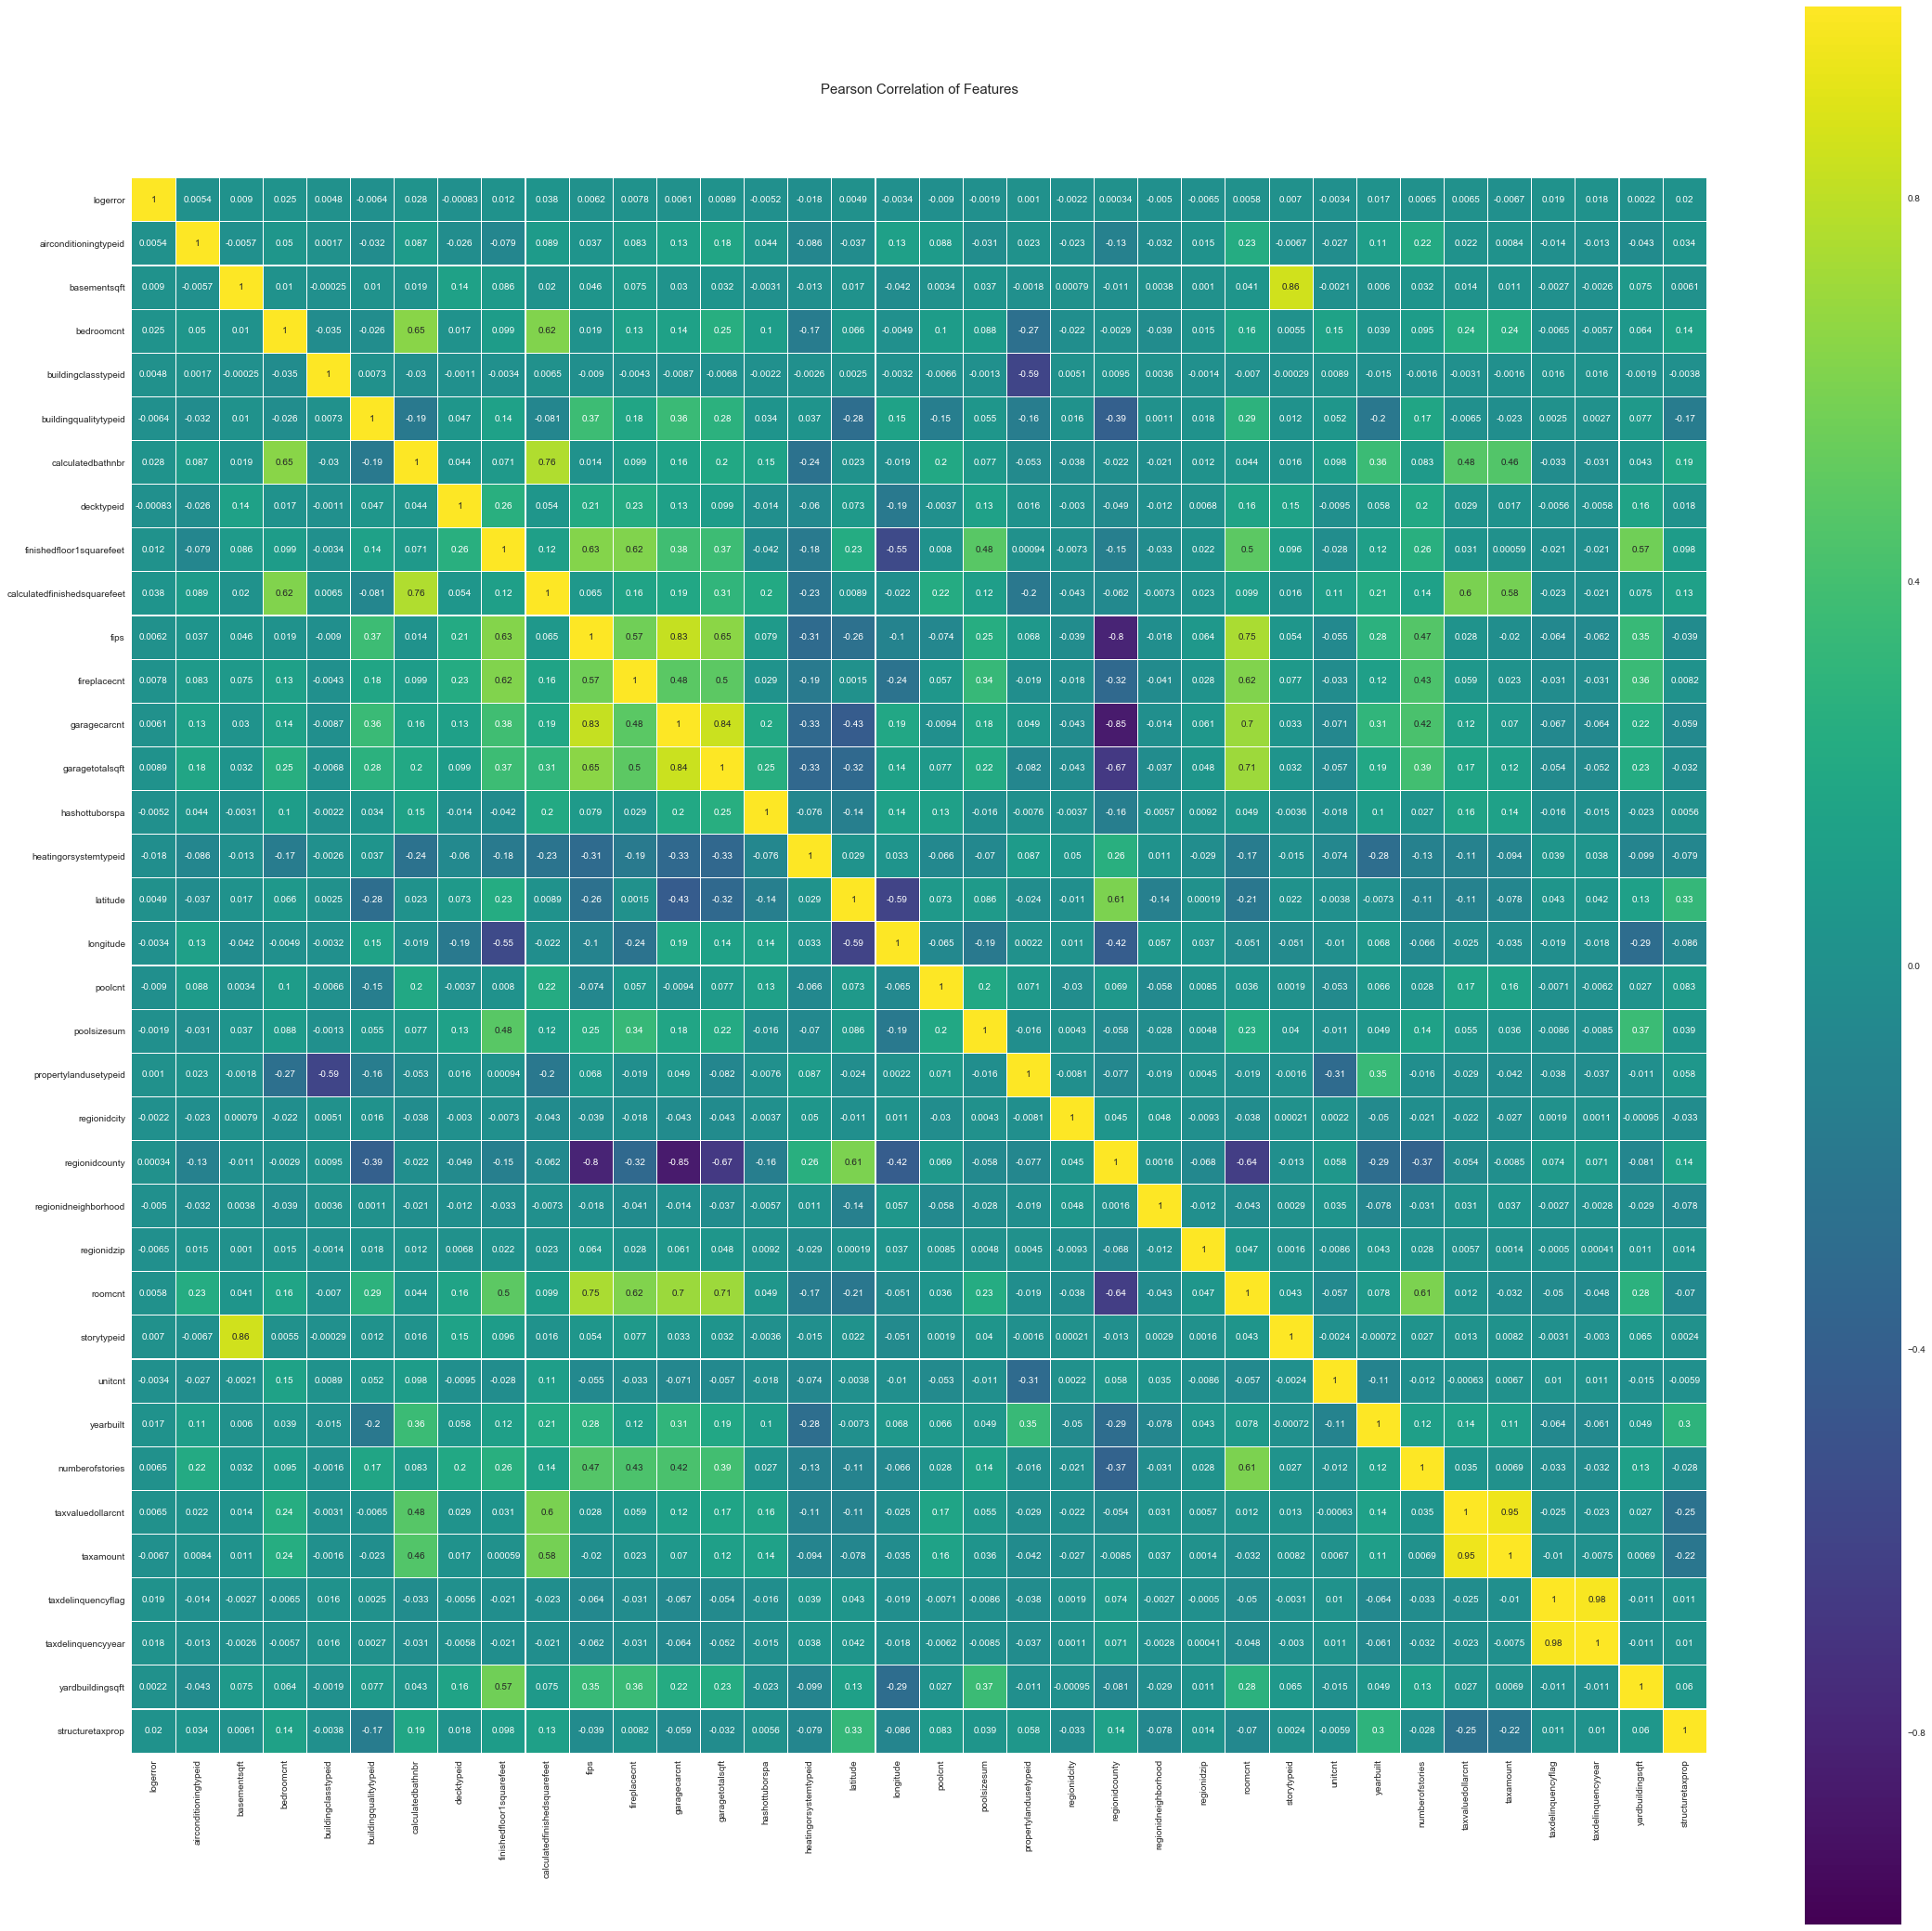

In [313]:
colormap = plt.cm.viridis
plt.figure(figsize=(38,38))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(train.astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

Part 7 Create Training set

In [314]:
for c, dtype in zip(df_train.columns, df_train.dtypes):
	if dtype == np.float64:
		df_train[c] = df_train[c].astype(np.float32)

In [315]:
x_train = df_train.drop(['parcelid', 'logerror','transactiondate'], axis=1)
y_train = df_train['logerror'].values
print(x_train.shape, y_train.shape)

(90275, 35) (90275,)


In [316]:
train_columns = x_train.columns
print(x_train.info())
print(x_train.columns)
for c in x_train.dtypes[x_train.dtypes == object].index.values:
    x_train[c] = (x_train[c] == True)
    
gc.collect()

split = 80000
x_train, y_train, x_valid, y_valid = x_train[:split], y_train[:split], x_train[split:], y_train[split:]
print(x_valid.shape)
print(y_valid.shape)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90275 entries, 0 to 90274
Data columns (total 35 columns):
airconditioningtypeid           90275 non-null float32
basementsqft                    90275 non-null float32
bedroomcnt                      90275 non-null float32
buildingclasstypeid             90275 non-null float32
buildingqualitytypeid           90275 non-null float32
calculatedbathnbr               90275 non-null float32
decktypeid                      90275 non-null float32
finishedfloor1squarefeet        90275 non-null float32
calculatedfinishedsquarefeet    90275 non-null float32
fips                            90275 non-null int64
fireplacecnt                    90275 non-null float32
garagecarcnt                    90275 non-null float32
garagetotalsqft                 90275 non-null float32
hashottuborspa                  90275 non-null float32
heatingorsystemtypeid           90275 non-null float32
latitude                        90275 non-null float32
longitude    

In [317]:
print('Building DMatrix...')

d_train = xgb.DMatrix(x_train, label=y_train)
d_valid = xgb.DMatrix(x_valid, label=y_valid)

del x_train, x_valid; gc.collect()

Building DMatrix...


0

In [318]:
print('Training ...')

params = {}
params['eta'] = 0.02
params['objective'] = 'reg:linear'
params['eval_metric'] = 'mae'
params['max_depth'] = 4
params['silent'] = 1

watchlist = [(d_train, 'train'), (d_valid, 'valid')]
clf = xgb.train(params, d_train, 10000, watchlist, early_stopping_rounds=100, verbose_eval=10)

del d_train, d_valid

Training ...
[0]	train-mae:0.488065	valid-mae:0.481117
Multiple eval metrics have been passed: 'valid-mae' will be used for early stopping.

Will train until valid-mae hasn't improved in 100 rounds.
[10]	train-mae:0.402226	valid-mae:0.395411
[20]	train-mae:0.332693	valid-mae:0.326035
[30]	train-mae:0.276534	valid-mae:0.270055
[40]	train-mae:0.231324	valid-mae:0.225093
[50]	train-mae:0.195066	valid-mae:0.189185
[60]	train-mae:0.166128	valid-mae:0.160576
[70]	train-mae:0.143131	valid-mae:0.137912
[80]	train-mae:0.124986	valid-mae:0.120087
[90]	train-mae:0.110815	valid-mae:0.106203
[100]	train-mae:0.09986	valid-mae:0.095535
[110]	train-mae:0.091503	valid-mae:0.087442
[120]	train-mae:0.085199	valid-mae:0.081434
[130]	train-mae:0.080518	valid-mae:0.077055
[140]	train-mae:0.077082	valid-mae:0.073936
[150]	train-mae:0.074582	valid-mae:0.071706
[160]	train-mae:0.072767	valid-mae:0.070123
[170]	train-mae:0.071446	valid-mae:0.069032
[180]	train-mae:0.070492	valid-mae:0.068277
[190]	train-mae:0.0

In [319]:
print('Building test set ...')

sample['parcelid'] = sample['ParcelId']
df_train = df_train.drop_duplicates(subset=['parcelid'], keep=False)
df_test = sample.merge(df_train, on='parcelid', how='left')
sample.info(null_counts=True)
df_train.info(null_counts=True)
df_test.info(null_counts=True)
print(df_train.shape)
print(prop.shape)
print(sample.shape)
print(df_test.info())
del prop; gc.collect()
print(train_columns)
x_test = df_test[train_columns]

for c in x_test.dtypes[x_test.dtypes == object].index.values:
    x_test[c] = (x_test[c] == True)

del df_test, sample; gc.collect()

d_test = xgb.DMatrix(x_test)

del x_test; gc.collect()

Building test set ...
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2985217 entries, 0 to 2985216
Data columns (total 8 columns):
ParcelId    2985217 non-null int64
201610      2985217 non-null int64
201611      2985217 non-null int64
201612      2985217 non-null int64
201710      2985217 non-null int64
201711      2985217 non-null int64
201712      2985217 non-null int64
parcelid    2985217 non-null int64
dtypes: int64(8)
memory usage: 182.2 MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 90026 entries, 0 to 90274
Data columns (total 38 columns):
parcelid                        90026 non-null int64
logerror                        90026 non-null float32
transactiondate                 90026 non-null object
airconditioningtypeid           90026 non-null float32
basementsqft                    90026 non-null float32
bedroomcnt                      90026 non-null float32
buildingclasstypeid             90026 non-null float32
buildingqualitytypeid           90026 non-null float32


14

In [320]:
print('Predicting on test ...')
print(d_test)
p_test = clf.predict(d_test)

p_test.shape



Predicting on test ...


(2985217,)

In [321]:
del d_test; gc.collect()

sub = pd.read_csv('sample_submission.csv')
for c in sub.columns[sub.columns != 'ParcelId']:
    sub[c] = p_test